# Monte Carlo Simulation for Social Distancing to Prevent COVID-19 Infection

This notebook holds the analysis for the Monte Carlo Simulation.

In [2]:
# Dependencies

import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')


In [31]:
# Running simulation

# Percentage of the population that doesn't move (stationary)
stationary_percentages = np.arange(0, 1, 0.1).tolist()

# DataFrame creation
# TODO: Update this part with proper model / simulation instead of random  data generation.

df = pd.DataFrame({
    "Stationary Percentage": [],
    "Death Rate": [],
    "Total Infection Rate": [],
    "Max Infection Rate": [],
    "Average Stop Period": []
})

run_per_stat_percentage = 10000

for stat_percentage in stationary_percentages:
    
    death_rate = np.random.uniform(low=0.0, high=1.0, size=run_per_stat_percentage)
    total_infection_rate = np.random.uniform(low=0, high=100, size=run_per_stat_percentage).astype(int)
    max_infection_rate = np.random.uniform(low=0, high=100, size=run_per_stat_percentage).astype(int)
    avg_stop_period = (np.random.lognormal(mean=1, sigma=0.1, size=run_per_stat_percentage) * 100).astype(int)
    
    new_df = pd.DataFrame({
        "Stationary Percentage": np.repeat(stat_percentage, run_per_stat_percentage),
        "Death Rate": death_rate,
        "Total Infection Rate": total_infection_rate,
        "Max Infection Rate": max_infection_rate,
        "Average Stop Period": avg_stop_period
    })
    
    df = df.append(new_df, ignore_index=True)
    

In [32]:
display(df)

,Stationary Percentage,Death Rate,Total Infection Rate,Max Infection Rate,Average Stop Period
0,0.0,0.524806,68.0,70.0,269.0
1,0.0,0.800150,47.0,43.0,300.0
2,0.0,0.944691,26.0,10.0,243.0
3,0.0,0.802096,36.0,73.0,222.0
4,0.0,0.477700,26.0,29.0,264.0
...,...,...,...,...,...
99995,0.9,0.748773,53.0,15.0,234.0
99996,0.9,0.210935,34.0,59.0,272.0
99997,0.9,0.375630,35.0,45.0,275.0
99998,0.9,0.868645,84.0,41.0,286.0


In [73]:
# Show graphs for each category against each stationary percentage

mean_df = df.groupby("Stationary Percentage").mean()

display(mean_df)

,Death Rate,Total Infection Rate,Max Infection Rate,Average Stop Period
Stationary Percentage,,,,
0.0,0.503077,49.6801,49.6884,272.5631
0.1,0.496259,49.4825,49.7210,272.6850
0.2,0.496554,49.5676,49.0625,273.0616
0.3,0.495962,49.4902,49.4620,272.3581
0.4,0.502305,48.9246,50.0334,272.4369
0.5,0.503626,49.6610,49.6900,272.7886
0.6,0.498996,49.1883,49.0898,272.9429
0.7,0.499102,49.6945,49.4689,272.9628
0.8,0.495830,49.3559,49.7451,272.6390


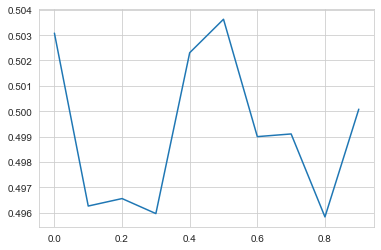

In [74]:
# Plot for Death Rate

sns.lineplot(data=mean_df["Death Rate"])

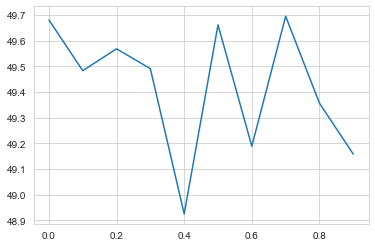

In [75]:
# Plot for Total Infection Rate

sns.lineplot(data=mean_df["Total Infection Rate"])

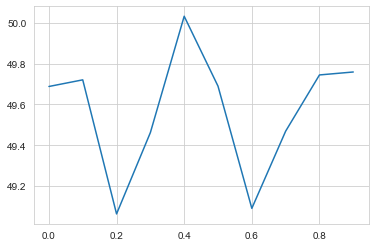

In [76]:
# Plot for Max Infection Rate
sns.lineplot(data=mean_df["Max Infection Rate"])

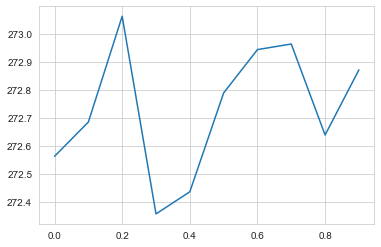

In [77]:
# Plot for Average Stop Period
sns.lineplot(data=mean_df["Average Stop Period"])